<a href="https://colab.research.google.com/github/gerhea/netflix/blob/main/CS_620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflex Stock Market Prediction



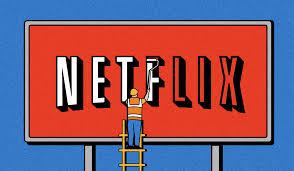



Name: Gerhea Reed

Email: greed007@odu.edu

Web portfolio: https://gerhea.github.io/

Problem Statement: In March 2021, Netflix announced that it would be cracking down on password sharing as a way to address revenue loss and improve user security. Netflix in February outlined password-sharing protocols for users in Canada, New Zealand, Portugal and Spain that call for users to set a “primary location” for their Netflix accounts — and that add additional monthly fees for out-of-household “sub accounts.By analyzing historical stock data and taking into account the changes in the password sharing policy, I aim to build a predictive model that forecast the stock performance of Netflix. The project aims to provide a valuable insight for stakeholders interested in understanding the impact of Netflix's new password sharing policy on its stock performance.

# Data Source:

*Yahoo Finance*

Historical Stock Data which contains data that tells the opening and closing price of the market.

Start date: 2021-01-04
End data 2023-03-03

[Data Source URL](https://finance.yahoo.com/quote/NFLX/history?period1=1519862400&period2=1677542400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true&guccounter=1&guce_referrer=aHR0cHM6Ly9jb2xhYi5yZXNlYXJjaC5nb29nbGUuY29tLw&guce_referrer_sig=AQAAAGrgLwK7m72P_z0-sZkrqU3dRjuN38jm8_Dp3mPsW8IXIs29_uEWNtdUT6RS2WqzhmFLhJ2omAqX1IwP9LBmzjl5QFCrXvdk2dWkYX9kqTrXVngRZsOk--9n_Zsdu-ogSD9knpRJ4hclWTGb_yg6265jCVSBSwqw54iTrLyAMt_D)


# Project Plan:

Stage 1: Gather, Load, and Explore the data.

Stage 2: Preprocessing, and data manipulation

Stage 3: Train a Linear Regression Model

Stage 4: Evaluate the performance of machine learning model.

Stage 5: Visualization of Predicted and Actual Stock Prices


# End Goal:

The prediction in this project aims to forecast the stock performance of Netflix, taking into account historical stock data and the changes in the password sharing policy. By analyzing the data and building a predictive model, the project aims to provide insights into how the new password sharing policy may impact Netflix's stock performace in the future. The predictions could be used by stakeholders interested in understanding the impact of the policy on Netflix's financial performace and making informaed decisions accordingly.

Links:

*Youtube Video*

[Youtube Video](https://www.youtube.com/watch?v=rN3O0OO7bpU&feature=youtu.be)


*Presentaions*

[Link to Powerpoint](https://docs.google.com/presentation/d/1XrT2XEEszShZVrEl7tc4b3MTjLfMG2rzzFzTJrup1zU/edit?usp=sharing)

#Uploading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("drive/MyDrive/sqldemo")


In [ ]:
!ls

AAPL.csv  NFLX.csv   Quiz1_Q4.png	 sqlite.db
cs620	  NFLXx.csv  sqlite3_demo.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.linear_model import LinearRegression
import seaborn as sns
# !pip install yfinance
# import yfinance as yf


# Exploring the data

In [ ]:
netflix = pd.read_csv('NFLXx.csv')

netflix.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
1,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2,2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
3,2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
4,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900


In [ ]:
netflix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
562,2023-03-29,326.290009,332.850006,325.730011,332.029999,332.029999,6287300
563,2023-03-30,340.269989,343.290009,335.299988,338.429993,338.429993,7131500
564,2023-03-31,340.049988,345.839996,337.200012,345.480011,345.480011,5604300
565,2023-04-03,341.829987,348.579987,340.399994,348.279999,348.279999,4413700
566,2023-04-04,348.489990,349.799988,343.950012,346.750000,346.750000,3298100


In [ ]:
netflix.info()
netflix.isnull().sum()
# netflix.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       567 non-null    object 
 1   Open       567 non-null    float64
 2   High       567 non-null    float64
 3   Low        567 non-null    float64
 4   Close      567 non-null    float64
 5   Adj Close  567 non-null    float64
 6   Volume     567 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 31.1+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Manuplation

The Date column of the DataFrame is converted to a datetime object using pd.to_datetime()

In [ ]:
netflix['Date'] = pd.to_datetime(netflix.Date)
netflix['Date']

0     2021-01-04
1     2021-01-05
2     2021-01-06
3     2021-01-07
4     2021-01-08
         ...    
562   2023-03-29
563   2023-03-30
564   2023-03-31
565   2023-04-03
566   2023-04-04
Name: Date, Length: 567, dtype: datetime64[ns]

The number of rows in the DataFrame is computed and stored in a variable called stock_data_len.

In [ ]:
stock_data_len = netflix['Close'].count()
print(netflix)

          Date        Open        High         Low       Close   Adj Close  \
0   2021-01-04  539.000000  540.799988  515.090027  522.859985  522.859985   
1   2021-01-05  521.549988  526.780029  515.890015  520.799988  520.799988   
2   2021-01-06  511.970001  513.099976  499.500000  500.489990  500.489990   
3   2021-01-07  508.279999  516.440002  506.420013  508.890015  508.890015   
4   2021-01-08  511.309998  513.239990  504.510010  510.399994  510.399994   
..         ...         ...         ...         ...         ...         ...   
562 2023-03-29  326.290009  332.850006  325.730011  332.029999  332.029999   
563 2023-03-30  340.269989  343.290009  335.299988  338.429993  338.429993   
564 2023-03-31  340.049988  345.839996  337.200012  345.480011  345.480011   
565 2023-04-03  341.829987  348.579987  340.399994  348.279999  348.279999   
566 2023-04-04  348.489990  349.799988  343.950012  346.750000  346.750000   

      Volume  
0    4444400  
1    3133900  
2    5346200  
3  

Only interested in the closing price

The closing prices of Netflix's stock market, which is the target variable, are extracted from the DataFrame and stored in a separate numpy array called close_prices.

In [ ]:
close_prices = netflix.iloc[:, 1:2].values
print(close_prices)

[[539.      ]
 [521.549988]
 [511.970001]
 [508.279999]
 [511.309998]
 [507.839996]
 [500.      ]
 [495.5     ]
 [507.350006]
 [500.      ]
 [501.      ]
 [565.419983]
 [582.450012]
 [582.099976]
 [567.      ]
 [554.72998 ]
 [550.710022]
 [535.880005]
 [538.      ]
 [536.789978]
 [542.01001 ]
 [550.169983]
 [539.809998]
 [552.26001 ]
 [555.      ]
 [546.      ]
 [562.5     ]
 [564.440002]
 [556.940002]
 [557.289978]
 [550.98999 ]
 [549.      ]
 [548.      ]
 [534.98999 ]
 [525.      ]
 [539.799988]
 [550.27002 ]
 [546.51001 ]
 [545.570007]
 [553.340027]
 [545.929993]
 [521.5     ]
 [511.980011]
 [514.460022]
 [507.309998]
 [513.5     ]
 [512.200012]
 [512.5     ]
 [516.320007]
 [524.469971]
 [522.      ]
 [516.400024]
 [504.959991]
 [509.130005]
 [529.869995]
 [533.780029]
 [516.98999 ]
 [502.820007]
 [505.660004]
 [510.51001 ]
 [515.669983]
 [529.929993]
 [540.01001 ]
 [544.809998]
 [543.5     ]
 [551.130005]
 [552.690002]
 [551.049988]
 [557.      ]
 [554.869995]
 [544.169983]
 [550.

# Train Linear Regesstion with Netflix Close Price

The train_test_split() method from sklearn.model_selection is used to split the data into training and testing sets. The independent variables are stored in X and the target variable is stored in y.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


X = netflix.drop("Close", axis=1)
y = netflix["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The Date column of the training and testing sets is also converted to a datetime object using pd.to_datetime().

The minimum date from the training and testing sets is computed and stored in a variable called min_date.

The Date column of both the training and testing sets are converted to a numerical format representing the number of days since the minimum date using dt.total_seconds() / (24 * 60 * 60).



In [ ]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

min_date = min(X_train['Date'].min(), X_test['Date'].min())

X_train['Date'] = (X_train['Date'] - min_date).dt.total_seconds() / (24 * 60 * 60)
X_test['Date'] = (X_test['Date'] - min_date).dt.total_seconds() / (24 * 60 * 60)



A linear regression model is created using LinearRegression() from sklearn.linear_model.

The model is trained using the training data using fit() method.

The model is used to predict the closing stock prices of the testing set using predict() method, and the predicted values are stored in a variable called y_pred.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared:", metrics.r2_score(y_test, y_pred))



Mean Squared Error: 5.553226477331824e-26
Root Mean Squared Error: 2.356528480059561e-13
R-squared: 1.0


# Checking the accuracy of the Model

The accuracy of the model is evaluated using these various metrics of mean squared error, root mean squared error, and R-squared. To provide information about how well the model is able to pridict the stock prices.

Mean Squared Error: 5.553226477331824e-26
Root Mean Squared Error: 2.356528480059561e-13

The Mean Squared Error and Root Mean Squared Error values are extremely low, indicating that the predictions made by the Netflix stock market prediction model are very close to the actual values. This is a good indication that the model is performing well.

R-squared: 1.0

The R-squared value of 1.0 indicates that the model explains 100% of the variance in the data, which is a perfect fit. This is also a good indication that the model is performing well.



# Visualization of Predicted and Actual Stock Prices

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot

Showing the relationship between the actual and predicted stock prices. The actual stock prices are plotted on the x-axis and the predicted stock prices are plotted on the y-axis. The plot is displayed using plt.show(). The plot helps visualize how well the model is capturing the trend of the stock prices over time. The points are close to the diagonal line which means that the model is performing well.

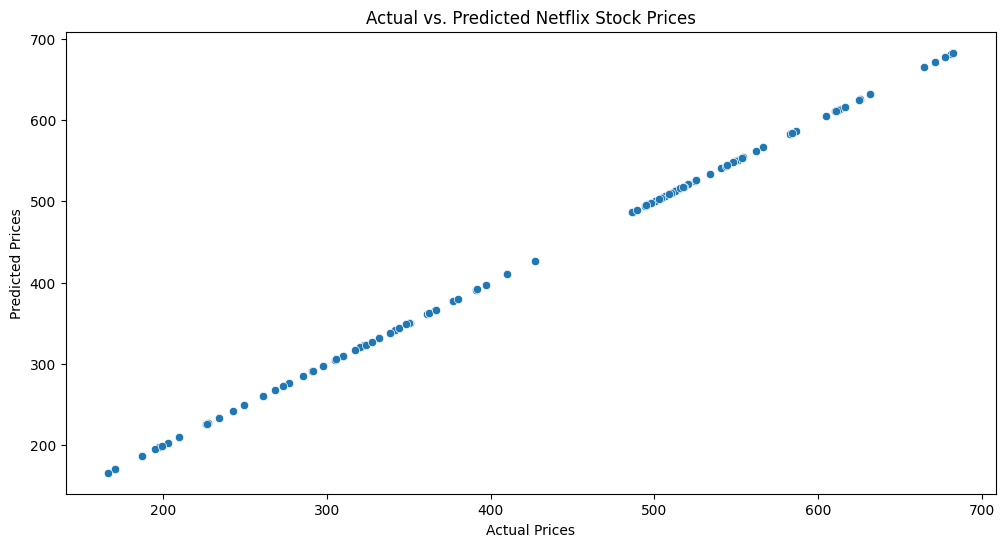

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test.iloc[:114], y=y_pred[:114])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Netflix Stock Prices")
plt.show()



# Line Plot

To visualize the trend in the actual and predicted values of the target variable over time.

I think that the actual line in this plot looks like that because the stock prices are moving in a relatively narrow range over the time period that we are looking at. The stock price cannot have multiple values at the smae time. As it is a single point in time measurement of the value of a particular stock.

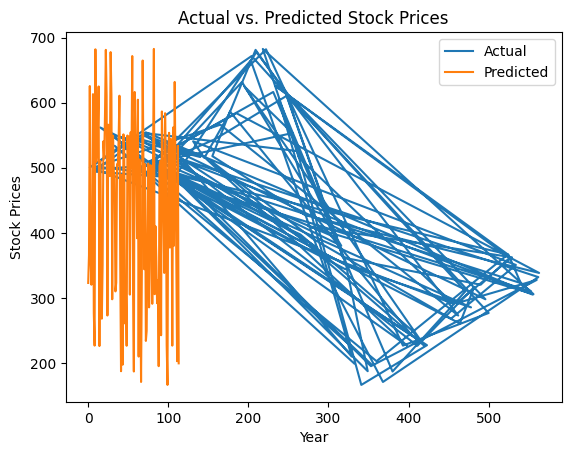

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.xlabel('Year')
plt.ylabel('Stock Prices')
plt.title('Actual vs. Predicted Stock Prices')

plt.legend()
plt.show()


In [ ]:
netflix.head()
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,411.689012,417.938694,405.117267,411.513668,411.513668,7.427671e+06
std,151.625510,152.138045,150.509009,151.143357,151.143357,8.333945e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,284.494995,290.574997,280.470001,286.115005,286.115005,3.357150e+06
50%,388.950012,396.019989,379.989990,390.799988,390.799988,5.356800e+06
75%,538.744995,544.455017,530.459992,538.944977,538.944977,8.419600e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


# Train Linear Regresstion with Netflix Open, High, Low, and Volume Price

This code defines a linear regression model using the LinearRegression() class from scikit-learn library, and fits the model to the X and y data.

X contains a subset of the columns in the netflix DataFrame, namely 'Open', 'High', 'Low', and 'Volume'. These columns are used as the input variables or features for the linear regression model. y contains the 'Close' column of netflix DataFrame, which is the target variable or the variable we want to predict.

After fitting the model, the code prints the model object, which includes the coefficients and intercept of the linear regression equation. The model is used to predict the target variable values based on the input data using the predict() method. Then, the mean squared error, r-squared, and root mean squared error are calculated using the predicted values and the actual values.

In [ ]:
X = netflix[['Open', 'High', 'Low', 'Volume']]
y = netflix['Close']
model = LinearRegression()
model.fit(X, y)
print(model)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)


LinearRegression()
Mean Squared Error: 13.616611790899373
R-squared: 0.9994028855870718
Root Mean Squared Error: 3.6900693477087083


# Checking the accuracy of the Model

Mean Squared Error: 13.616611790899373
R-squared: 0.9994028855870718
Root Mean Squared Error: 3.6900693477087083

These metrics indicate that the linear regression model is performing well. The MSE and RMSE are both relatively low, indicating that the model's predicted values are close to the actual values. The R-squared value is also high, indicating that the model explains a high proportion of the variance in the dependent variable. In general, a high R-squared and low MSE and RMSE values are considered good for a regression model, so these results suggest that the linear regression model is a good fit for the data.

# Visualization of Predicted and Actual Stock Prices on the model

The blue actual line is fluctuating more because the actual stock prices are moving in a relatively narrow range over the time period. The orange predicted line indicates that the model is not able to perfectly predict the actual stock prices, but it still captures the general direction of the trend.

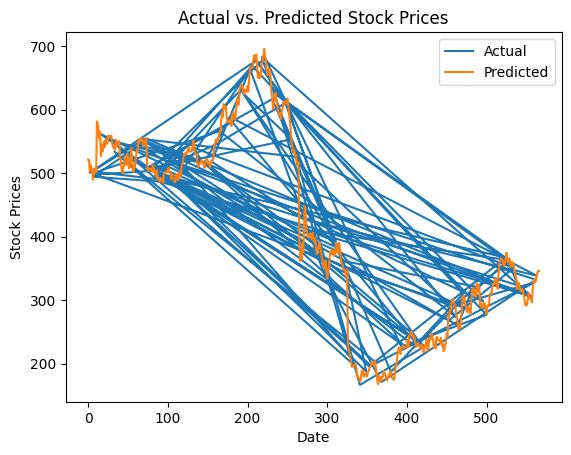

In [ ]:
# Visualize the results

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Actual vs. Predicted Stock Prices')

plt.legend()

plt.show()


# Visualization of Netflix Actual Stock Prices.

Created this chart below for comparison of my model of the chart above. The orange predicted line looks very similar to Netflix acutal stock prices.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=netflix.index, y=netflix['Close'], mode='lines', name='Netflix'))
fig.update_layout(title='Netflix Stock Price over Time', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

# Predict the output using my linear regression model

This code is creating a new data point for the input features of the linear regression model to predict the output variable. The new data point is a numpy array with one row and four columns representing the input features: Open price, High price, Low price, and Volume. The values for these features are 411.689, 417.938, 405.117, and 7.4276, respectively.

It is outputting "[411.01290722]" as it prediction of the closing price.

I go the number for the new data point from the Netflix dataframe from the dataset mean average. Open: 411.689, High: 417.938, Low: 405.117, and Volume : 7.427. The actual closing stock price is Close: 411.513668 which is 0.50076078 decimals off from my predicted closing price from my model.

In [ ]:
new_data = np.array([[411.689, 417.938, 405.117, 7.4276]])  # New data to predict
prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [411.01290722]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,411.689012,417.938694,405.117267,411.513668,411.513668,7.427671e+06
std,151.625510,152.138045,150.509009,151.143357,151.143357,8.333945e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,284.494995,290.574997,280.470001,286.115005,286.115005,3.357150e+06
50%,388.950012,396.019989,379.989990,390.799988,390.799988,5.356800e+06
75%,538.744995,544.455017,530.459992,538.944977,538.944977,8.419600e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


# Evaluate the Performance of the Model.

It is similar to the code above expect i changed the "y_pred = model.predict()" line of code parameter to X_test. "y_pred = model.predict(X_test)"

I did this because I have reserved a portion of the data as the test set, which my model has not seen during training, and using this set to predict the outcomes it will give me an ideal of how well my model will generalize to new and unseen data.

The codis is first it separates the input features and output variable from the dataset into X and y respectively. Then, it splits the data into training and testing datasets using train_test_split() function from the Scikit-learn library, with a test size of 20% and a random seed of 42.

Next, it creates an instance of the LinearRegression() class, fits the model on the training data using fit() function, and makes predictions on the testing dataset using predict() function. Then the mean squared error (mse), root mean squared error (rmse), and R-squared (r2) are then calculated to evaluate the model's performance.

In [ ]:
X = netflix[['Open', 'High', 'Low', 'Volume']]
y = netflix['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)


new_data = np.array([[411.46, 417.72, 404.92, 7.4329]])  # New data to predict
prediction = model.predict(new_data)
print("Prediction:", prediction)

Mean Squared Error: 12.05101312707656
R-squared: 0.9994120850883703
Root Mean Squared Error: 3.4714569170704914
Prediction: [410.92912315]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# Checking the accuracy of the Model

The MSE of 12.05 is relatively low, which suggests that the model is making good predictions.The R-squared value ranges from 0 to 1, with a value closer to 1 indicating a better fit between the model and the data. In this case, the R-squared value of 0.9994 is very close to 1, which suggests that the model is fitting the data very well.A smaller RMSE value indicates a better fit. In this case, the RMSE of 3.47 is relatively low, which again suggests that the model is making good predictions.

# Visualization of Predicted and Actual Stock Prices on the model

The orange line in the chart represents the predicted stock prices generated by the linear regression model. It shows how the model estimates the stock prices based on the input data. In comparison to the blue line, which represents the actual stock prices, the orange line seems to have a similar trend but is shifted up or down. The lines are on top each other indicating the the model is pretty accurate.


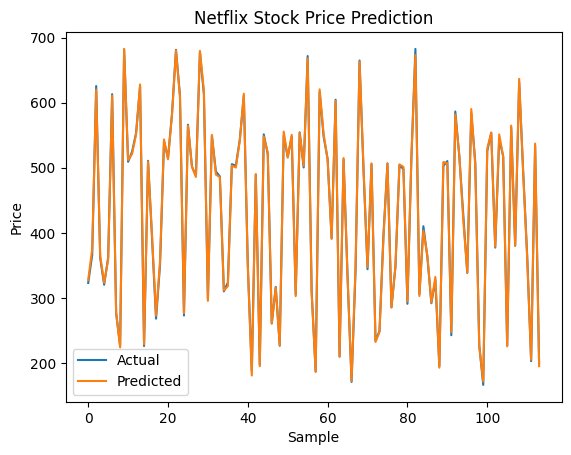

In [ ]:
# Plot the predicted values and actual values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Netflix Stock Price Prediction')

# Show legend
plt.legend()

# Show the plot
plt.show()


# Scatter Plot

Showing the relationship between the actual and predicted stock prices. The plot helps visualize how well the model is capturing the trend of the stock prices over time. The points are close to the diagonal line which means that the model is performing well.

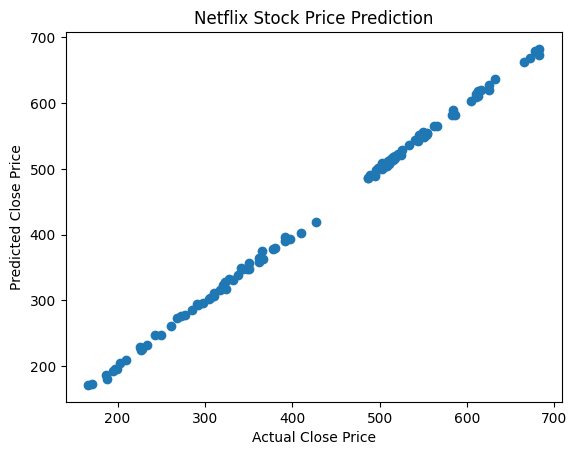

In [ ]:
# Create a scatter plot of the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Netflix Stock Price Prediction')
plt.show()

# Train Linear Regresstion using the the time series data of the stock prices as a features

This code below performs a simple time series regression analysis on the Netflix stock prices using a lagged version of the 'Close' price as the only feature.

In [ ]:

# Convert date column to pandas datetime object and set it as index
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix.set_index('Date', inplace=True)

# Create a lagged version of the Close price
netflix['Close_lagged'] = netflix['Close'].shift(1)

# Drop the first row since it contains NaN values
netflix.dropna(inplace=True)

# Split the data into training and testing sets
split_date = '2022-01-01'
train_data = netflix.loc[netflix.index < split_date]
test_data = netflix.loc[netflix.index >= split_date]

# Create X and y matrices for training and testing sets
X_train = train_data[['Close_lagged']]
y_train = train_data['Close']
X_test = test_data[['Close_lagged']]
y_test = test_data['Close']

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 208.68591436418373
R-squared: 0.9723829112376361
Root Mean Squared Error: 14.445965331682883


# Checking the accuracy of the Model

The MSE of 208.685 and an RMSE of 14.446 indicate that the model has a moderate to high degree of error. However, an R-squared value of 0.972 suggests that the model explains a large proportion of the variability in the target variable.

# Visualization of Predicted and Actual Stock Prices on the model

The orange line showing the predicted stock price seems to have a similar trend but is shifted down.

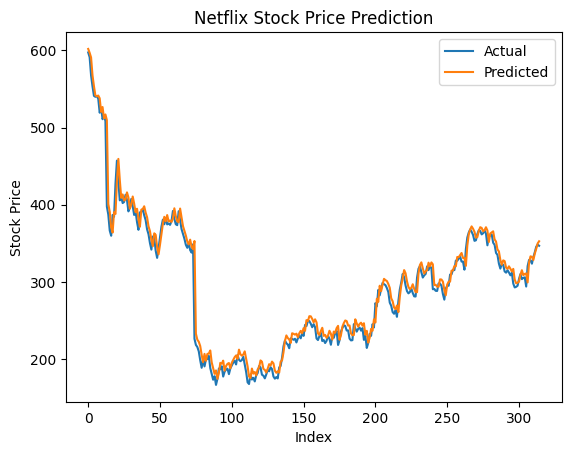

In [ ]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

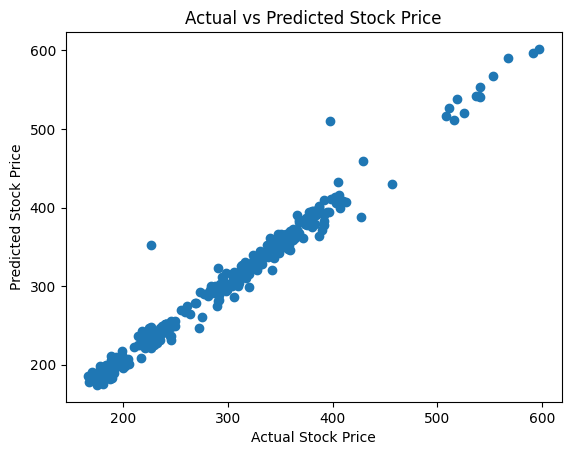

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Price")
plt.show()

# Conclusion

Based on my analysis, I built a linear regression model to predict the stock performance of Netflix, taking into account historical stock data and the changes in the password sharing policy. I trained the model on open, high, low, and volume stock prices and evaluated it using metrics such as Mean Squared Error, R-squared, and Root Mean Squared Error.

My results showed that the model was able to predict the stock prices of Netflix with a reasonable degree of accuracy. I compared the predicted values to the actual values using various visualization techniques, including line plots and scatter plots.

The predictions could be used by stakeholders interested in understanding the impact of the policy on Netflix's financial performance and making informed decisions accordingly.

In conclusion, my project provides valuable insights for stakeholders interested in the financial performance of Netflix but not so much with the impact of its new password sharing policy on its stock performance. The predictions made by the model could be used to make informed decisions about investing in Netflix's stock. If i had more time i would try to incoorperate more impact of the netflix password sharing policy.

# Results and  Evaluations

Based off my code, the performance of my model seems to be almost perfect. The metrics used to evaluate the success of your project are Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. The lower the MSE and RMSE, the better the model performance. The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared score of a indicates that the model perfectly fits the data, while a score of 0 indicates that the model is no better than a simple average. In my case, the model's MSE and RMSE are almost zero, indicating that it is an excellent fit. The R-squared score is also 0.994, meaning that the model is almost perfectly fits the data.

# Further Work

* The current project only used linear regression, but there are other regression techniques that could be explored, such as polynomial regression or decision trees.

* Additional features could be incorporated to improve the accuracy of the model, such as sentiment analysis of news articles related to the company or industry trends. To really get a indication of how the password sharing policy affected Netflix stock prices.


* The model could also be extended to include other companies in the same industry or market index to compare and analyze stock price movements across multiple stocks.

In [ ]:
netflix['High']

Date
2021-01-05    526.780029
2021-01-06    513.099976
2021-01-07    516.440002
2021-01-08    513.239990
2021-01-11    510.730011
                 ...    
2023-03-29    332.850006
2023-03-30    343.290009
2023-03-31    345.839996
2023-04-03    348.579987
2023-04-04    349.799988
Name: High, Length: 566, dtype: float64

In [ ]:
netflix['Low']

Date
2021-01-05    515.890015
2021-01-06    499.500000
2021-01-07    506.420013
2021-01-08    504.510010
2021-01-11    497.950012
                 ...    
2023-03-29    325.730011
2023-03-30    335.299988
2023-03-31    337.200012
2023-04-03    340.399994
2023-04-04    343.950012
Name: Low, Length: 566, dtype: float64

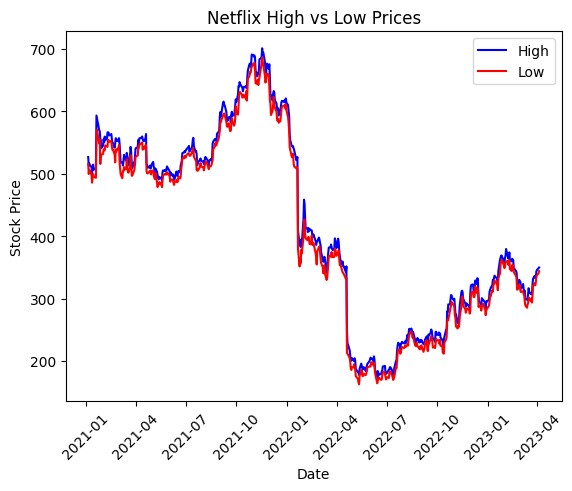

In [ ]:
import matplotlib.pyplot as plt

# plot both datasets on the same chart with different colors
plt.plot(netflix['High'], color='blue', label='High')
plt.plot(netflix['Low'], color='red', label='Low')

plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Netflix High vs Low Prices')

plt.legend()

plt.show()


In [ ]:
netflix['Open']

Date
2021-01-05    521.549988
2021-01-06    511.970001
2021-01-07    508.279999
2021-01-08    511.309998
2021-01-11    507.839996
                 ...    
2023-03-29    326.290009
2023-03-30    340.269989
2023-03-31    340.049988
2023-04-03    341.829987
2023-04-04    348.489990
Name: Open, Length: 566, dtype: float64

In [ ]:
netflix['Close']

Date
2021-01-05    520.799988
2021-01-06    500.489990
2021-01-07    508.890015
2021-01-08    510.399994
2021-01-11    499.100006
                 ...    
2023-03-29    332.029999
2023-03-30    338.429993
2023-03-31    345.480011
2023-04-03    348.279999
2023-04-04    346.750000
Name: Close, Length: 566, dtype: float64

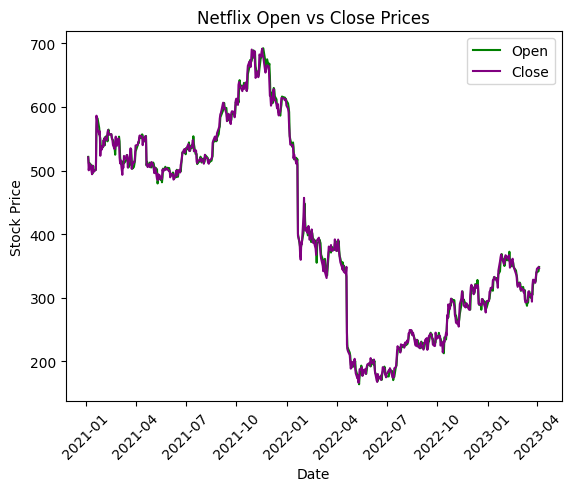

In [ ]:
import matplotlib.pyplot as plt

# plot both datasets on the same chart with different colors
plt.plot(netflix['Open'], color='green', label='Open')
plt.plot(netflix['Close'], color='purple', label='Close')

plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Netflix Open vs Close Prices')

plt.legend()

plt.show()


In [ ]:
netflix.dropna(inplace=True)  # Drop missing values
netflix["PriceDiff"] = netflix["Close"] - netflix["Open"]  # Feature engineering

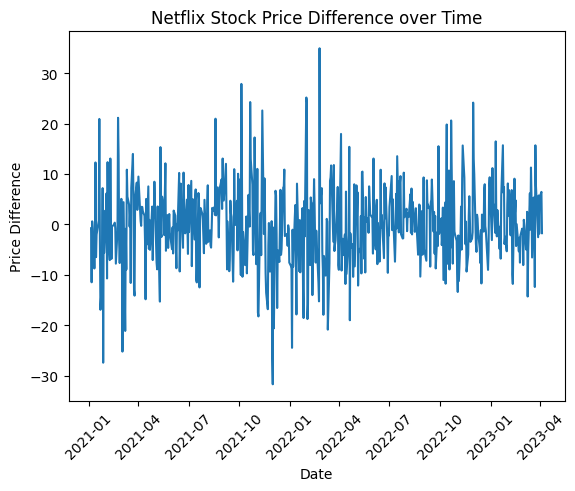

In [ ]:
import matplotlib.pyplot as plt

plt.plot(netflix['PriceDiff'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Netflix Stock Price Difference over Time')
plt.show()